<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest_symptom_isolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

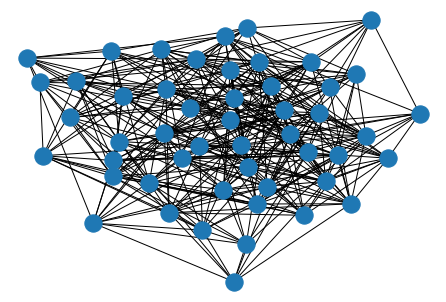

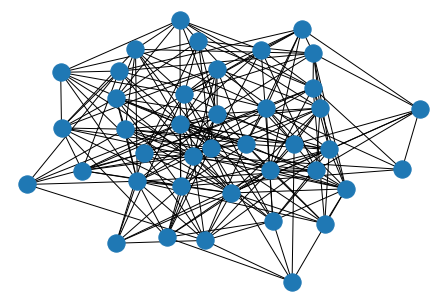

In [1]:
#Erdos-Renyi Graph in Networkx
import numpy as np
from statistics import mean
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities
NUM_TESTS  = K/10 #Number of test available
PAS = 0.2 #Probability of Asymptomatic
PS = 1 - PAS #Probability of Not Asymptomatic(i.e. Symptomatic)


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 0 ... 0 0 1]
 [0 0 1 ... 1 0 0]
 [0 1 0 ... 1 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
[[0 1 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 1 1 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
print(Node)
print(len(Node))


{}
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: [], 50: [], 51: [], 52: [], 53: [], 54: [], 55: [], 56: [], 57: [], 58: [], 59: [], 60: [], 61: [], 62: [], 63: [], 64: [], 65: [], 66: [], 67: [], 68: [], 69: [], 70: [], 71: [], 72: [], 73: [], 74: [], 75: [], 76: [], 77: [], 78: [], 79: [], 80: [], 81: [], 82: [], 83: [], 84: [], 85: [], 86: [], 87: [], 88: [], 89: [], 90: [], 91: [], 92: [], 93: [], 94: [], 95: [], 96: [], 97: [], 98: [], 99: [], 100: [], 101: [], 102: [], 103: [], 104: [], 105: [], 106: [], 107: [], 108: [], 109: [], 110: [], 111: [], 112: [], 113: [], 114: [], 115: [], 116: [], 117: [], 118: [], 119: [], 120: [], 121: [], 122: [],

In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
    Node[i*NN+j].append({'ISOLATED_S' : 0})
    Node[i*NN+j].append({'ISOLATED_I' : 0})   
print(Node)
print(len(Node))


{0: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 1: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 2: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 3: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 4: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 5: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 6: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 7: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 8: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 9: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 10: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOL

In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1

  Symptom = random.choices([0,1],weights=(PAS,PS), k=1)[0]
  Isolate = 0

  Agent[k].append({'Symptom' : Symptom, 'Isolate' : Isolate})
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state,0,0]})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state,Symptom,Isolate], 'C' : 0})
    Agent[k].append({'State' : Rand_state, 'C' : 0 })

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
print(Node)
print(Agent)

{0: [{'Viral_load': 0}, {'S': 1}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {1984: [0, 0, 0]}], 1: [{'Viral_load': 0}, {'S': 4}, {'I': 1}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {4074: [0, 0, 0]}, {4090: [0, 0, 0]}, {5951: [0, 0, 0]}, {6375: [1, 1, 0], 'C': 0}, {9407: [0, 0, 0]}], 2: [{'Viral_load': 0}, {'S': 4}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {725: [0, 0, 0]}, {1204: [0, 0, 0]}, {1567: [0, 0, 0]}, {5905: [0, 0, 0]}], 3: [{'Viral_load': 0}, {'S': 5}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {875: [0, 0, 0]}, {1111: [0, 0, 0]}, {5453: [0, 0, 0]}, {7069: [0, 0, 0]}, {8757: [0, 0, 0]}], 4: [{'Viral_load': 0}, {'S': 5}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {1834: [0, 0, 0]}, {2084: [0, 0, 0]}, {3458: [0, 0, 0]}, {6985: [0, 0, 0]}, {7494: [0, 0, 0]}], 5: [{'Viral_load': 0}, {'S': 6}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {4076: [0, 0, 0]}, {5969: [0, 0, 0]}, {6959: [0, 0, 0]}, {7275

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1, num_tests=K):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'ISOLATED_S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'ISOLATED_I' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(6,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][2]['Home_node'])
                  neighbors.append(Agent_next[a_id][4]['First_node'])
                  neighbors.append(Agent_next[a_id][6]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][5]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][5]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][7]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][7]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][3]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][3]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][5]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][7]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][3]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      if max(P1,P2,PH) == PH:
                        PH = 3*PH
                        P1 = P1/3
                        P2 = P2/3
                      elif max(P1,P2,PH) == P1:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      else:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      #next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      next = random.choices(neighbors,weights=(.95,.025,.025), k=1)[0]
                      if next == Agent_next[a_id][8]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][4]['First_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][4]['First_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][5]['First_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][5]['First_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][5]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][6]['Second_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][6]['Second_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][7]['Second_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][7]['Second_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][7]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][2]['Home_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][2]['Home_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][3]['Home_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][3]['Home_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][3]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      if max(P1,P2,P3) == P1:
                        P1 = 3*P1
                        P2 = P2
                        P3 = P3
                      elif max(P1,P2,P3) == P2:
                        P1 = 3*P1
                        P2 = 2*P2
                        P3 = P1
                      else:
                        P1 = 3*P1
                        P2 = P2
                        P3 = 2*P3
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      #nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      nextn = random.choices(Agent_next[a_id][9]['Current_nodeN'],weights=(.90,.05,.05),k=1)[0]                    
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id][0] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id][0] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['C']+=1
            #if nex != cur:
            #  Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id][0] == 2:
            Node_next[nex][3]['R']+=1

          if Node[cur][agent][a_id][2] == 1:
            if Node[cur][agent][a_id][0] == 1:
              Node_next[nex][5]['ISOLATED_I']+=1

          
          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        Total = Node_next[i*len(GraphN.nodes)+j][1]['S'] - Node_next[i*len(GraphN.nodes)+j][4]['ISOLATED_S'] + Node_next[i*len(GraphN.nodes)+j][2]['I'] - Node_next[i*len(GraphN.nodes)+j][5]['ISOLATED_I'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] + 1
        W1 = (Node_next[i*len(GraphN.nodes)+j][2]['I'] - Node_next[i*len(GraphN.nodes)+j][5]['ISOLATED_I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load'])/Total
        W2 = (Node_next[i*len(GraphN.nodes)+j][1]['S'] - Node_next[i*len(GraphN.nodes)+j][4]['ISOLATED_S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1)/Total
        for agent in list(range(6,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'C' : 0})
              Node_next[i*len(GraphN.nodes)+j][agent][a_id][1] = random.choices([0,1],weights=(PAS,PS), k=1)[0]
              Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] = 0
              Agent_next[a_id][1]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] != 1:
              if Node_next[i*len(GraphN.nodes)+j][agent]['C'] == 4:  #Time-steps of 4 to get cured(I -> R)
                Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = 2
                count_IR+=1
                Agent_next[a_id][1]['State'] = 2
                Node_next[i*len(GraphN.nodes)+j][agent].pop('C') 
            elif Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] == 1:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = 2
              count_IR+=1
              Agent_next[a_id][1]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('C')

        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 

    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        agents=list(range(6,len(Node_next[i*len(GraphN.nodes)+j])))
        for agent in agents:
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if num_tests > 0:
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id][1] == 1:
              num_tests=num_tests - 1  
              if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
                num_tests=num_tests + 1 
                for agent in agents:
                  a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
                  num_tests=num_tests - 1
                  if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
                    if Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] == 0:
                      Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] = 1
                break 
            

            #elif Node_next[i*len(GraphN.nodes)+j][agent][a_id][1] == 0:
            #  p = random.choices([0,1],weights=(PAS,PS), k=1)[0]
            #  if p == 0:
            #    num_tests=num_tests - 1
            #    if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
            #      if Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] == 0:
            #        Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] = 1




    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next,num_tests

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  count_ISOLATED_S=0
  count_ISOLATED_I=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    count_ISOLATED_S+=Node[i][4]['ISOLATED_S']
    count_ISOLATED_I+=Node[i][5]['ISOLATED_I']
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,count_ISOLATED_S,count_ISOLATED_I,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][1]['State'] == 0:
      count_S+=1
    elif Agent[i][1]['State'] == 1:
      count_I+=1
    elif Agent[i][1]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9805, 9603, 9574, 9522, 9444, 9345, 9218, 9053, 8848, 8552, 8169, 7669, 7283, 6800, 6232, 5607, 4854, 4104, 3343, 2662, 2068, 1573, 1228, 1013, 875, 769, 695, 634, 579, 534, 513, 486, 475, 470, 466, 461, 458, 456, 456, 453, 453, 451, 451, 451, 451, 451]
[195, 397, 67, 119, 175, 258, 356, 469, 596, 793, 1049, 1384, 1210, 1489, 1776, 2062, 2429, 2696, 2889, 2945, 2786, 2531, 1877, 1493, 1121, 804, 533, 379, 296, 235, 182, 148, 73, 44, 36, 25, 17, 14, 10, 8, 5, 5, 5, 2, 2, 0]
[0, 0, 359, 359, 381, 397, 426, 478, 556, 655, 782, 947, 1507, 1711, 1992, 2331, 2717, 3200, 3768, 4393, 5146, 5896, 6895, 7494, 8004, 8427, 8772, 8987, 9125, 9231, 9305, 9366, 9452, 9486, 9498, 9514, 9525, 9530, 9534, 9539, 9542, 9544, 9544, 9547, 9547, 9549]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0
[[], [9805, 9603, 9574, 9

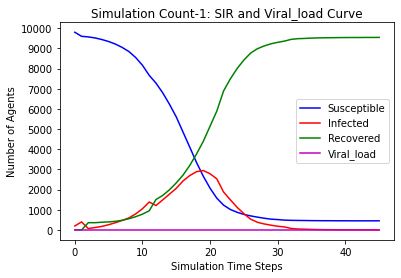

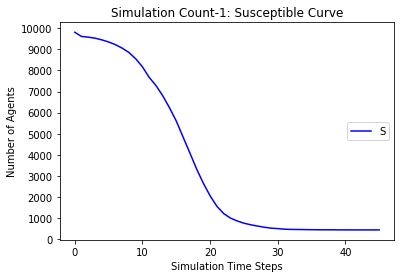

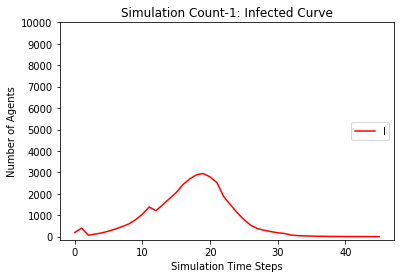

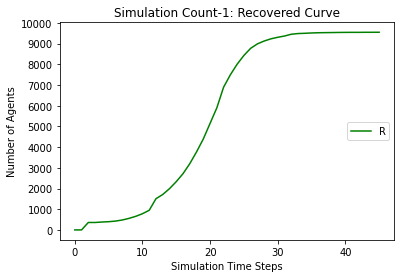

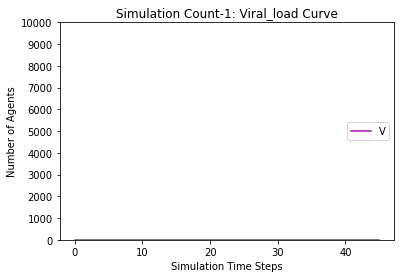

[9805, 9623, 9593, 9554, 9488, 9422, 9323, 9152, 8944, 8697, 8357, 7894, 7520, 7059, 6475, 5796, 5097, 4305, 3511, 2778, 2170, 1697, 1361, 1104, 914, 789, 696, 645, 602, 566, 547, 532, 526, 520, 514, 509, 509, 509, 509, 508, 507, 507, 505, 505, 503, 503, 503, 503, 503]
[195, 377, 61, 100, 145, 201, 270, 402, 544, 725, 966, 1258, 1069, 1370, 1732, 2098, 2423, 2754, 2964, 3018, 2927, 2608, 1878, 1506, 1179, 908, 665, 459, 312, 223, 149, 113, 59, 40, 31, 23, 17, 11, 5, 1, 2, 2, 4, 3, 4, 4, 2, 2, 0]
[0, 0, 346, 346, 367, 377, 407, 446, 512, 578, 677, 848, 1411, 1571, 1793, 2106, 2480, 2941, 3525, 4204, 4903, 5695, 6761, 7390, 7907, 8303, 8639, 8896, 9086, 9211, 9304, 9355, 9415, 9440, 9455, 9468, 9474, 9480, 9486, 9491, 9491, 9491, 9491, 9492, 9493, 9493, 9495, 9495, 9497]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

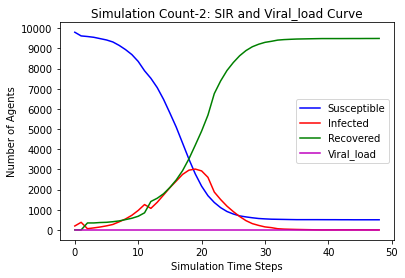

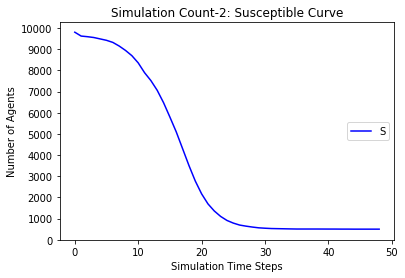

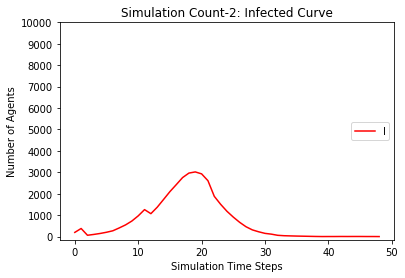

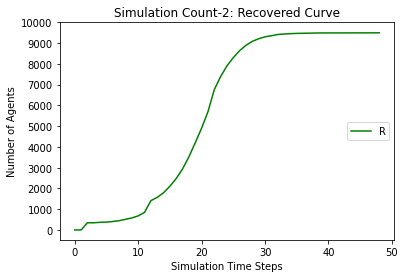

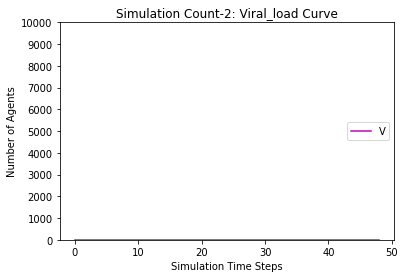

[9805, 9596, 9566, 9521, 9460, 9379, 9280, 9137, 8942, 8706, 8398, 7992, 7654, 7252, 6788, 6204, 5538, 4814, 4085, 3345, 2656, 2046, 1628, 1293, 1047, 862, 732, 645, 578, 528, 491, 470, 452, 439, 436, 429, 424, 422, 419, 418, 417, 416, 416]
[195, 404, 65, 110, 150, 217, 286, 384, 518, 673, 882, 1145, 946, 1195, 1464, 1788, 2116, 2438, 2703, 2859, 2882, 2768, 2198, 1883, 1524, 1184, 896, 648, 469, 334, 241, 175, 91, 69, 45, 41, 28, 17, 17, 11, 7, 6, 0]
[0, 0, 369, 369, 390, 404, 434, 479, 540, 621, 720, 863, 1400, 1553, 1748, 2008, 2346, 2748, 3212, 3796, 4462, 5186, 6174, 6824, 7429, 7954, 8372, 8707, 8953, 9138, 9268, 9355, 9457, 9492, 9519, 9530, 9548, 9561, 9564, 9571, 9576, 9578, 9584]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0
[[], [9805, 9603, 9574, 9522, 9444, 9345, 9218, 9053, 8848, 8552, 8169, 7669, 728

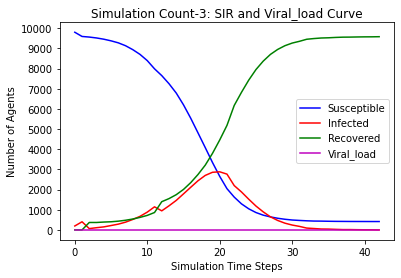

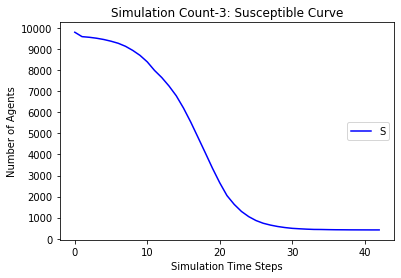

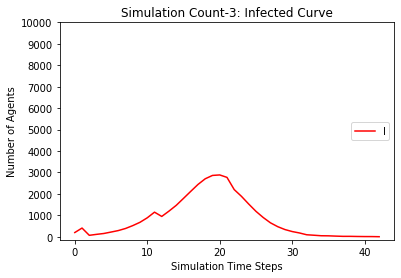

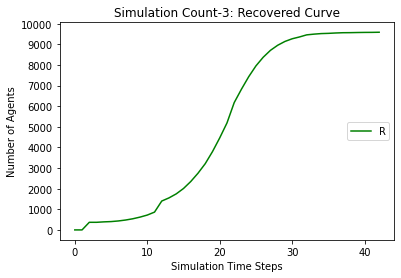

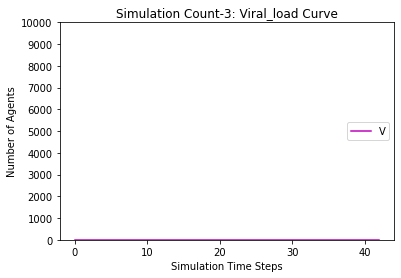

In [ ]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(100):
  j=0
  count_timestep=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  num_tests_p=NUM_TESTS
  num_tests_n=NUM_TESTS 
  Sj,Ij,Rj,ISOLATED_Sj,ISOLATED_Ij,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj >= 1 :
    Node_p,Node_n,Agent_p,Agent_n,num_tests_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1,num_tests_n)
    count_timestep=count_timestep+1
    if count_timestep == 10:
      num_tests_n = NUM_TESTS
      count_timestep=0
    #if num_tests_n < K/100:
    #  num_tests_n = NUM_TESTS
    j+=1 
    Sj,Ij,Rj,ISOLATED_Sj,ISOLATED_Ij,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  print(num_tests_n)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': SIR and Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Susceptible Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Infected Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Recovered Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

In [ ]:
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,100):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

print("Susceptible Average (100 Simulations):", SC)
print("Infected Average(100 Simulations):", IC)
print("Recovered Average(100 Simulations):", RC)
print("Viral_load Average(100 Simulations):", VT) 
print("Time Steps:", TC) 



plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: SIR and Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Infected Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))

plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Viral_load"),loc='center right')
plt.show() 



  
